# Random Versus Deterministic Sampling
This notebook compares random sampling with deterministic sampling (Halton sampler) for probabilistic roadmaps.

In [1]:
%load_ext autoreload
%autoreload 2
from mpb import MPB, MultipleMPB
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
# make sure to not use Level-3 fonts
mpl.rcParams['pdf.fonttype'] = 42
from copy import deepcopy
%config InlineBackend.figure_format='retina'

In [2]:
mpb = MPB()
mpb.set_planners(['prm'])
mpb.set_steer_functions(['reeds_shepp'])
mpb.set_corridor_grid_env(radius=3)
mpb["ompl.seed"] = 0

mpb_iid = deepcopy(mpb)
mpb_iid.set_id('iid')
mpb_iid["ompl.sampler"] = "iid"

mpb_halton = deepcopy(mpb)
mpb_halton.set_id('halton')
mpb_halton["ompl.sampler"] = "halton"

pool = MultipleMPB()
pool.benchmarks.append(mpb_iid)
pool.benchmarks.append(mpb_halton)
pool.run_parallel(runs=10, id='samplers', show_plot=False)
pool.merge('samplers/samplers.json', plan_names=['PRM (iid)', 'PRM (Halton)'])

Available memory: 51.20 GB, limiting each MPB process to 20.8% usage (10.67 GB).
Creating pool of 2 processes.
Running MPB with ID halton (log file at samplers/halton.log)...Running MPB with ID iid (log file at samplers/iid.log)...



iid:   0%|          | 0/10 [00:00<?, ?it/s]

halton:   0%|          | 0/10 [00:00<?, ?it/s]

Benchmark 1 (halton) finished successfully.
Benchmark 0 (iid) finished successfully.
All benchmarks succeeded.
Successfully merged [samplers/iid_results.json, samplers/halton_results.json] into samplers/samplers.json.


Visualizing samplers/samplers.json


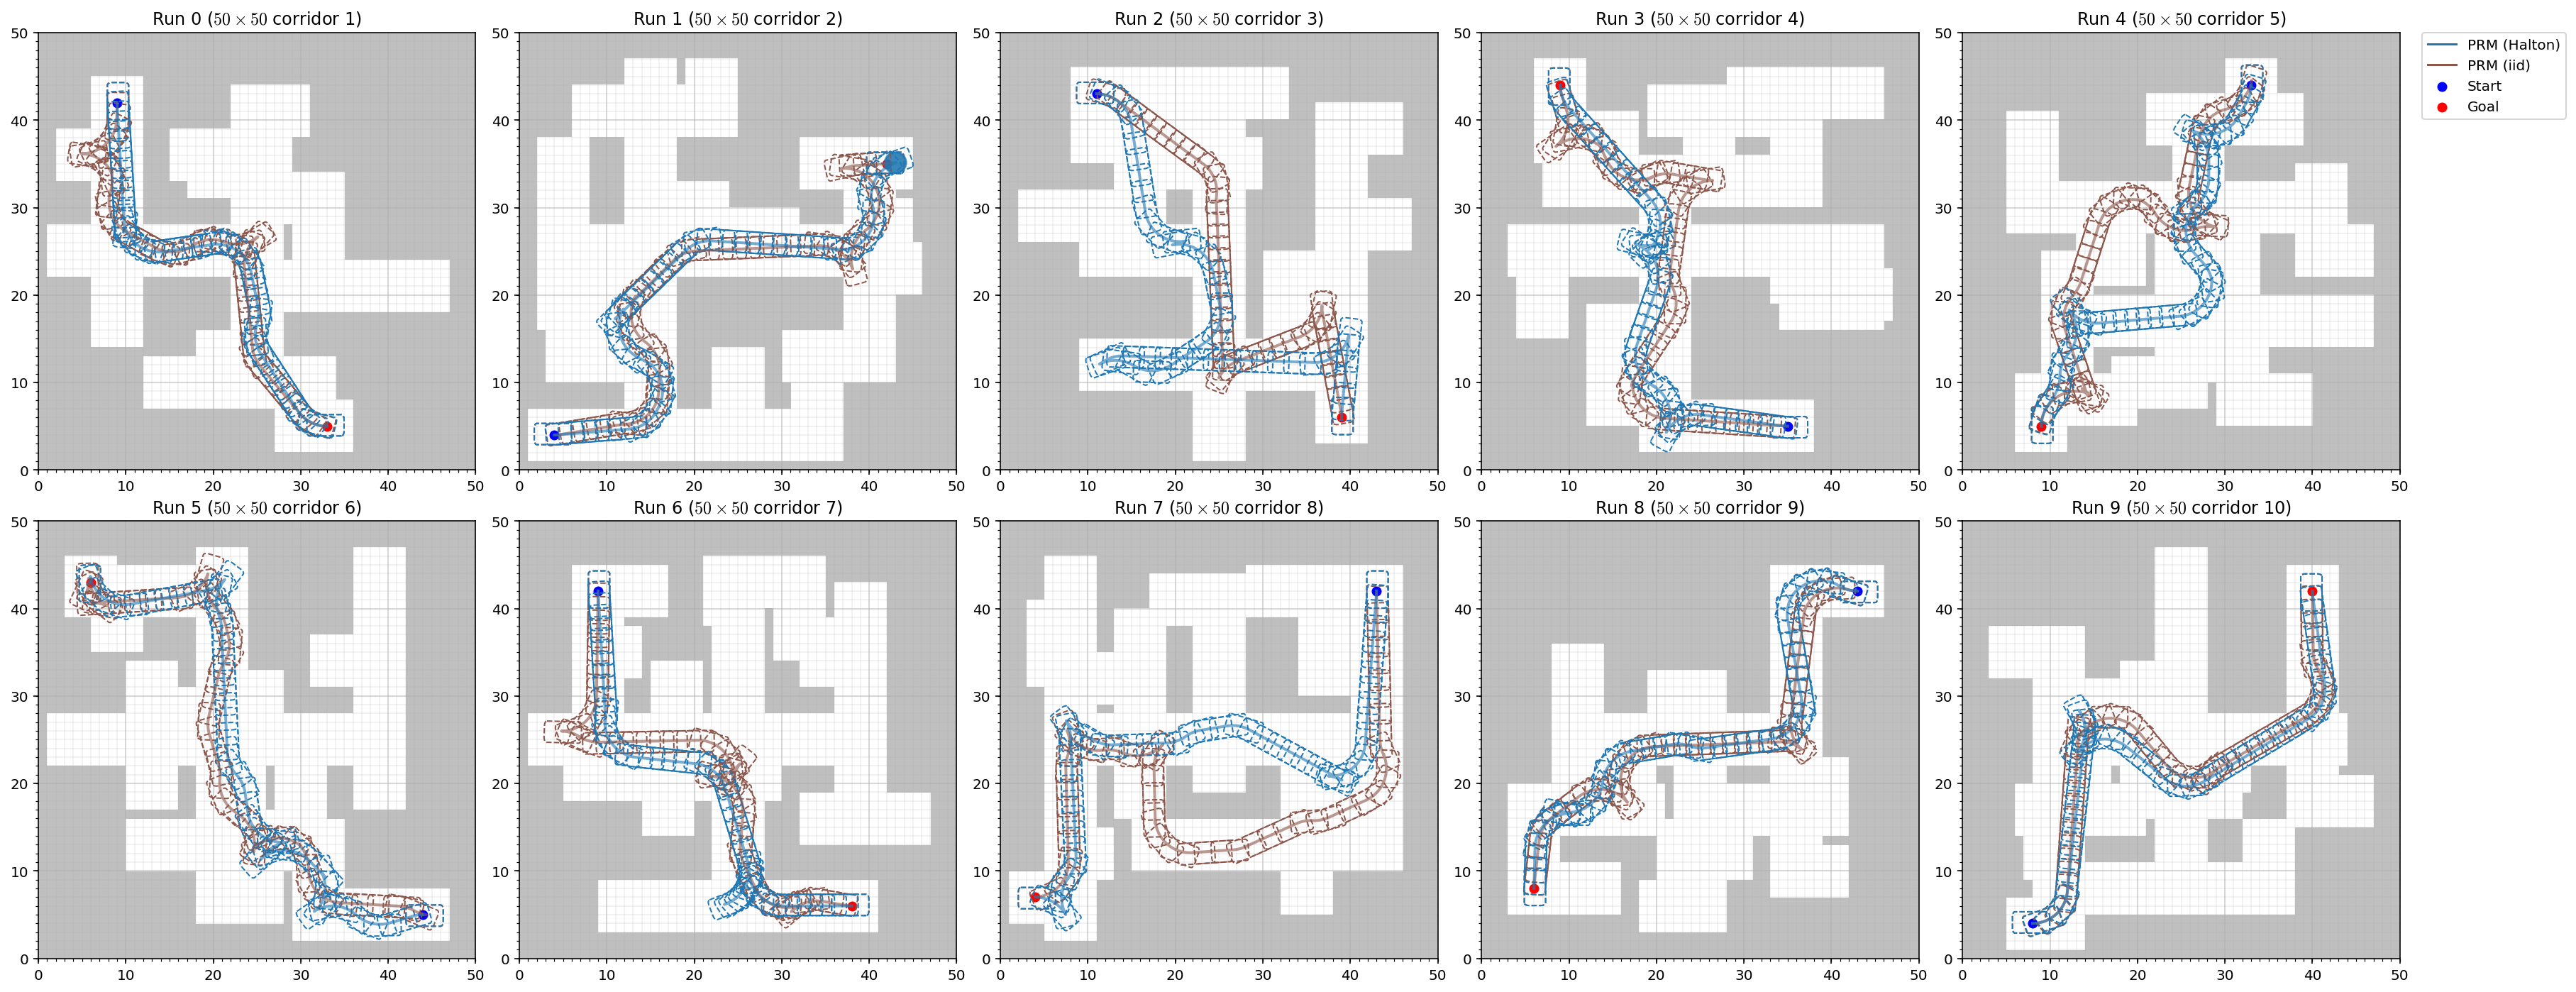

In [3]:
from trajectory import visualize
visualize('samplers/samplers.json')

Visualizing samplers/samplers.json...


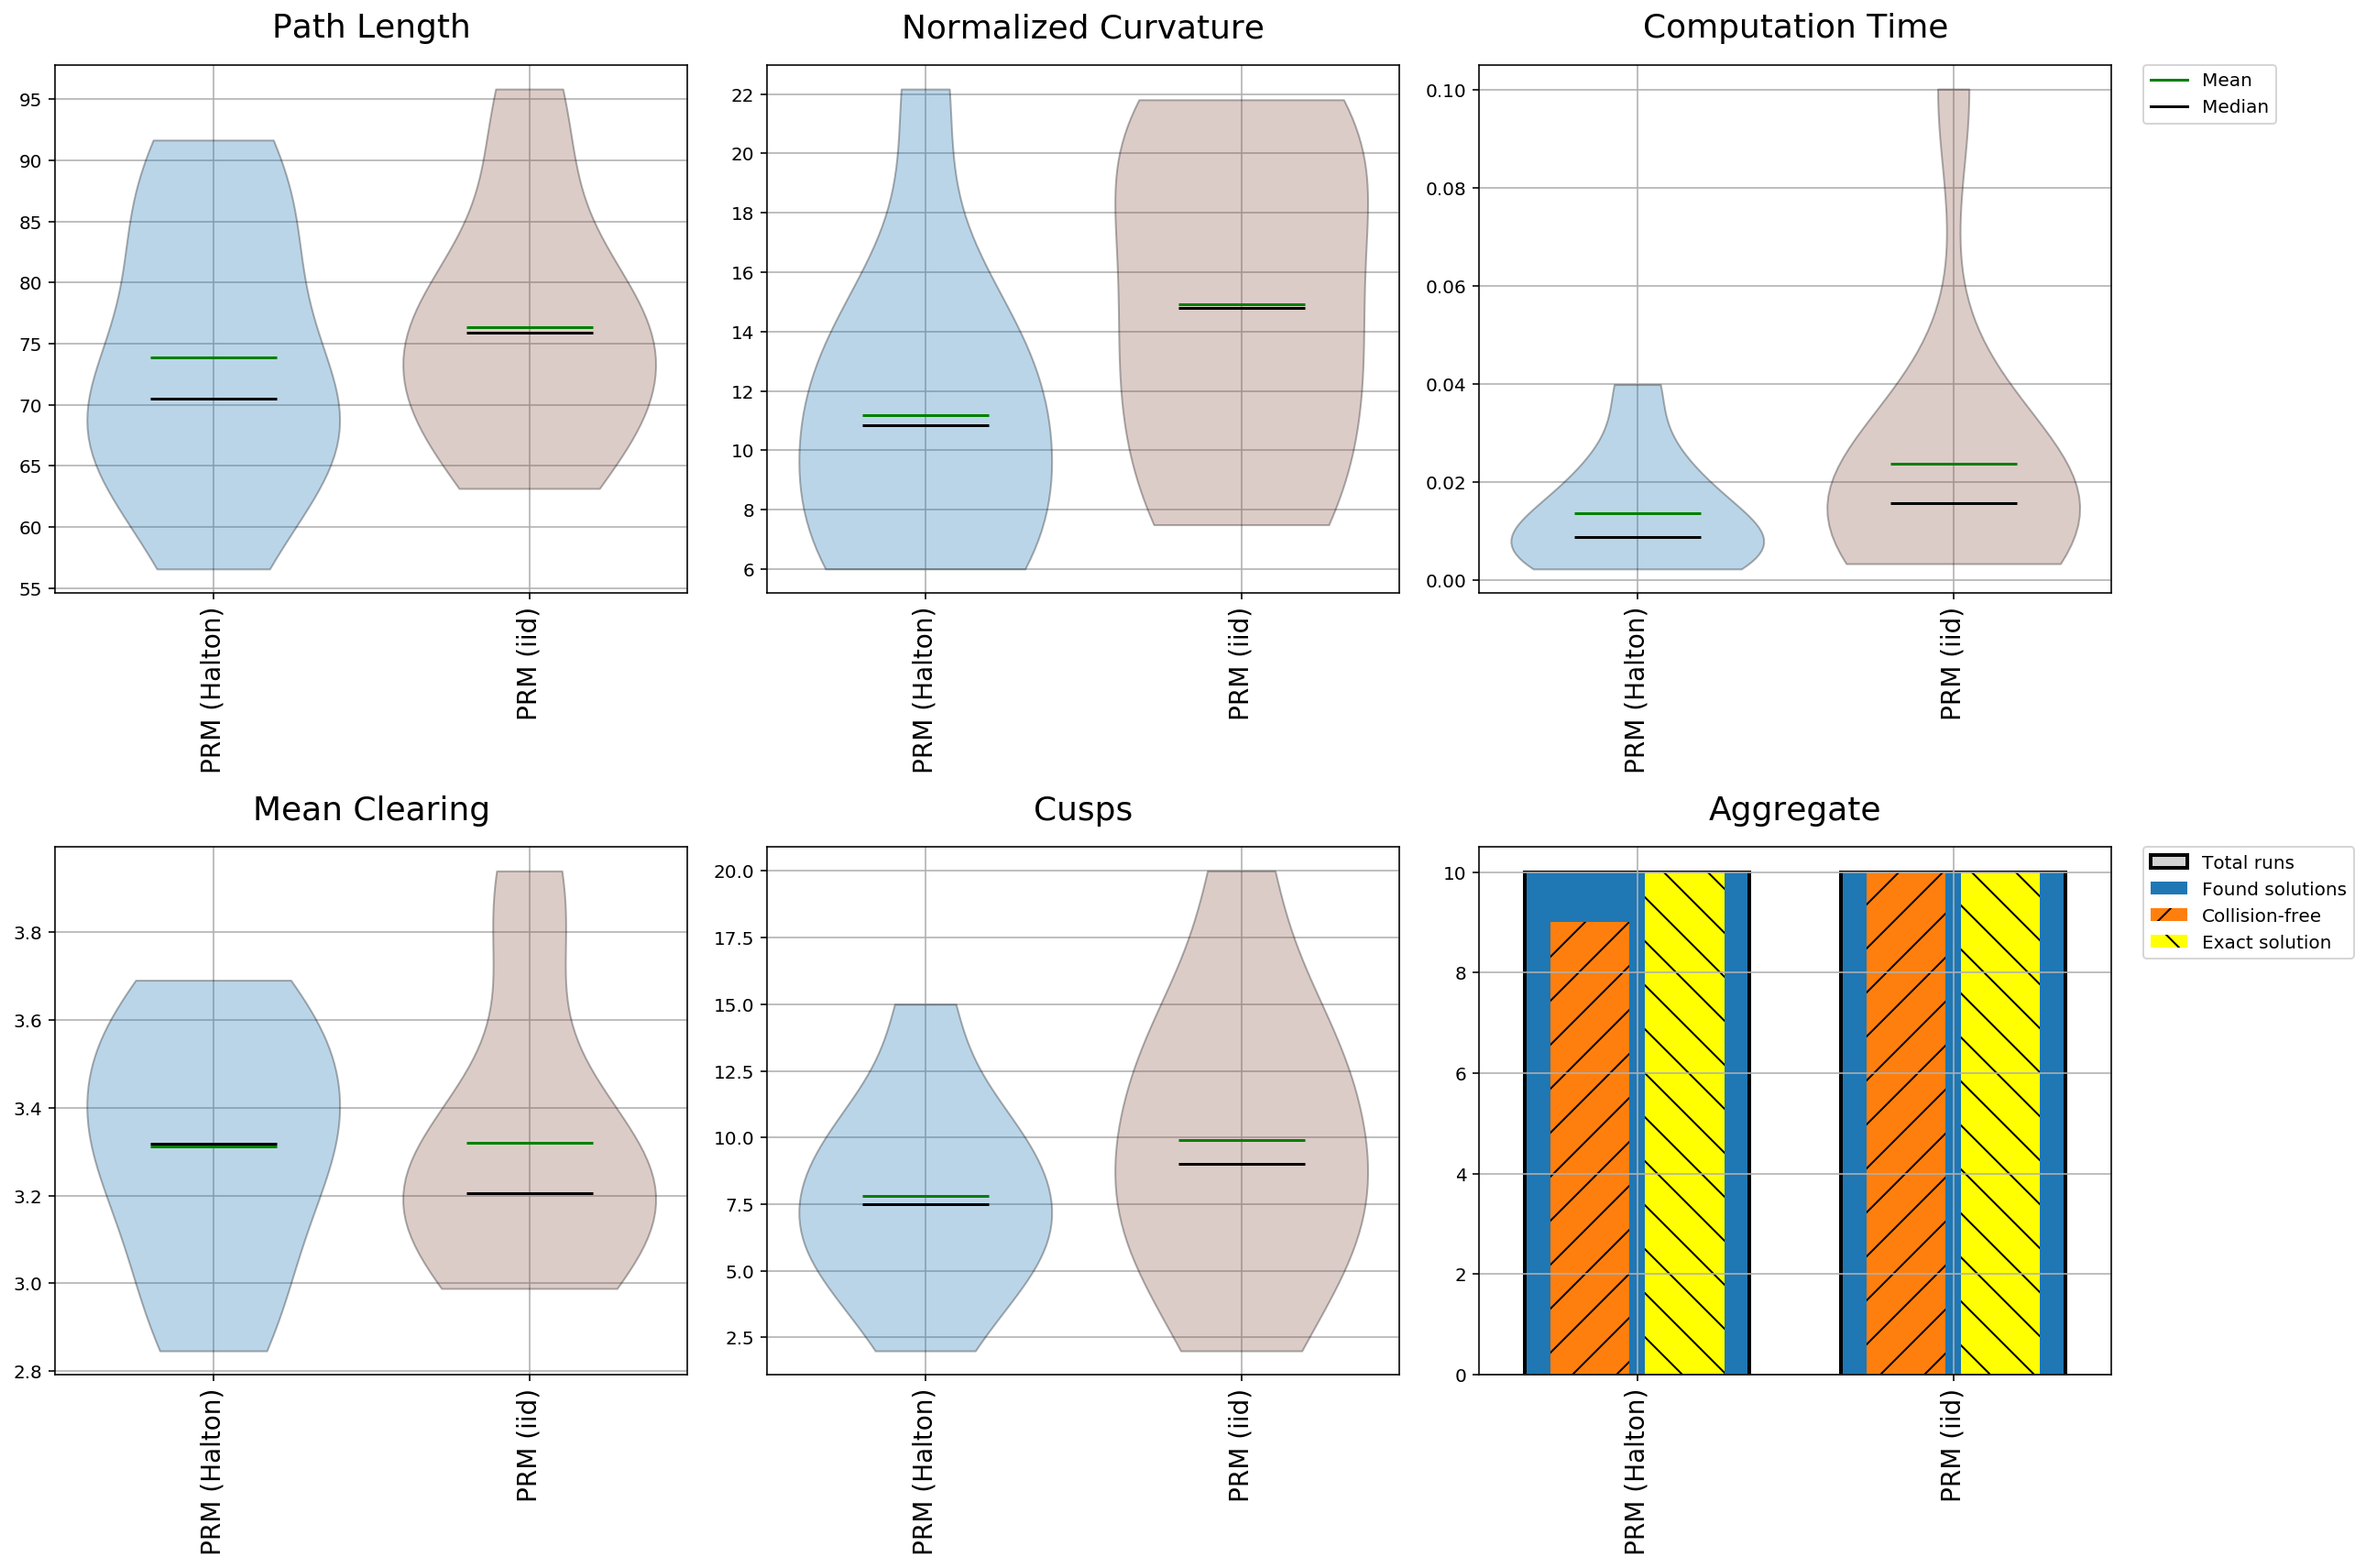

In [4]:
from plot_stats import plot_planner_stats
plot_planner_stats('samplers/samplers.json')